In [17]:
#LAr purifier constraints


In [36]:
#1. How much Oxygen can 0.75kg of CuO remove?

mass_CuO = 0.75 #kg
percent_CuO = 0.1
mass_O2_absorbed = percent_CuO * mass_CuO * (16/(16+63.55)) #16 g O in 1 mol of CuO
mol_O2_absorbed = (mass_O2_absorbed * 1000) / 32 #convert to kg and divide by molar mass
mol_O2_absorbed


0.47140163419233194

In [37]:
#Liam's calculation
#dirty argo is 1ppm
e_lifetime_micro = 200 #microseconds
e_lifetime_sec = e_lifetime_micro * 1e-6
k_e = 5.5e10

O2_concentration = 1 / (k_e * e_lifetime_sec)

LAr_density = 1400 #g/L
mol_Ar_per_L = LAr_density / Ar_molar_mass
O2_ppb = (O2_concentration / mol_Ar_per_L)*1e9
print("O2 concentration in ppb: ", O2_ppb)


O2 concentration in ppb:  2.594155844155845


In [38]:
#2. How much LAr can be purified with 2.63ppb impurity?

ppb = (O2_ppb)*1e-9
mol_Ar_263ppb = mol_O2_absorbed / ppb
mol_Ar_263ppb

#convert to L
Ar_molar_mass = 39.95 #g/mol
LAr_density = 1400 #g/L
mass_Ar_263ppb = mol_Ar_263ppb * Ar_molar_mass
volume_LAr_263ppb = mass_Ar_263ppb / LAr_density
volume_LAr_263ppb #L


5185417.97611565

In [4]:
#volume calculation of purifier

outer_diameter = 3.0 #inches
wall_thickness = 0.067 #inches
inner_diameter = outer_diameter - 2*wall_thickness
inner_radius = (inner_diameter * 0.0254)/2 #converted to meters (1in = 0.0254meters)
mass_kg = [0.75, 0.75] # copper, sieve
densities = [0.85, 0.77] #kg/L
cross_section = 3.14 * (inner_radius**2)

tube_volumes_L = [
    mass_kg[0]/densities[0],
    mass_kg[1]/densities[1]
]

#convert L to m^3
tube_volumes_m3 = [v / 1000 for v in tube_volumes_L]
#length = volume/cross section
tube_lengths_m = [v / cross_section for v in tube_volumes_m3]
tube_lengths_in = [L / 0.0254 for L in tube_lengths_m]

tube_lengths_in


[8.350628415101879, 9.218226172515063]

In [ ]:
#radiation from purifier
#refer to equations on 7/3/2025 Notes
# do i need to use just the area of a cylinder or of a tube? if only stainless steel prob cylinder

In [4]:
#heat load on valves PART 1

#CONDUCTION THROUGH PIPE
pipe_thermal_conductivity = 16.2 #W/mK, for stainless steel
pipe_od = 0.5 *  (0.0254) #inches to meters         (od = 0.5 w/ i_radius = 0.075)
pipe_id = 0.075 * (0.0254) #inches to meters   (or od = 0.375 and i_radius = 0.05)
pipe_thickness = (pipe_od - pipe_id) / 2
pipe_cross_section = 3.14 * (pipe_od**2 - pipe_id**2) / 4
pipe_length = 5 * (0.0254) #inches to meters
purifier_temp = 503 #kelvin, ~230celsius
valve_temp = 298 #kelvin, ~room temp

pipe_cond_heat_on_valve = (pipe_thermal_conductivity * pipe_cross_section * (purifier_temp-valve_temp)) / pipe_length
print("Pipe conducts: ", pipe_cond_heat_on_valve, "Watts")

#do conduction w/ gas as well
gas_thermal_conductivity = 0.0172 #hydrogen=0.1819, argon=0.0172
valve_cross_section = 3.14 * (pipe_id**2)
gas_cond_heat_on_valve = (gas_thermal_conductivity * valve_cross_section * (purifier_temp - valve_temp)) / pipe_length
print("Gas conducts: ", gas_cond_heat_on_valve, "Watts")

Pipe conducts:  3.2363763536249994 Watts
Gas conducts:  0.0003163721129999999 Watts


In [24]:
#heat load on valves PART 2

#CONVECTION from gas
conv_heat_transfer_coeff = 100 #W/(m^2K), moderate to fast forced flow
valve_cross_section = 3.14 * (pipe_id**2) / 4

conv_heat_on_valve = conv_heat_transfer_coeff * valve_cross_section * (purifier_temp - valve_temp)
print(conv_heat_on_valve, "Watts")

0.05840008481249998 Watts


In [24]:
%pip install matplotlib

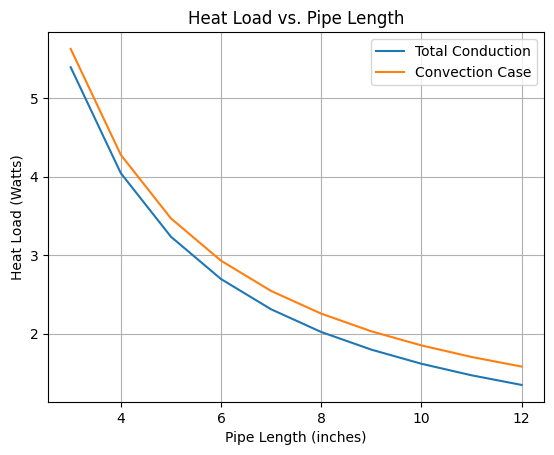

In [56]:
#how diff lengths affect heatload with a fixed pipe size

pipe_range = [3,12] #inches


pipe_thermal_conductivity = 16.2 #W/mK, for stainless steel
pipe_od = 0.5 *  (0.0254) #inches to meters         (od = 0.5 w/ i_radius = 0.075)
pipe_id = 0.075 * (0.0254) #inches to meters   (or od = 0.375 and i_radius = 0.05)
pipe_thickness = (pipe_od - pipe_id) / 2
pipe_cross_section = 3.14 * (pipe_od**2 - pipe_id**2) / 4
gas_thermal_conductivity = 0.0172 #hydrogen=0.1819, argon=0.0172
conv_heat_transfer_coeff = 100 #W/(m^2K), moderate to fast forced flow
valve_cross_section = 3.14 * (pipe_id**2)
purifier_temp = 503 #kelvin, ~230celsius
valve_temp = 298 #kelvin, ~room temp

def heatload_by_pipe(pipe_range):
    pipe_lengths = []
    pipe_heatloads = []
    for i in range(pipe_range[0], pipe_range[1]+1):
        pipe_length = i * 0.0254
        pipe_cond_heat_on_valve = (pipe_thermal_conductivity * pipe_cross_section * (purifier_temp-valve_temp)) / pipe_length
        pipe_lengths.append(i)
        pipe_heatloads.append(pipe_cond_heat_on_valve)
    return pipe_heatloads

def heatload_by_gas_cond(pipe_range):
    pipe_lengths = []
    gas_cond_heatloads = []
    for i in range(pipe_range[0], pipe_range[1]+1):
        pipe_length = i * 0.0254
        gas_cond_heat_on_valve = (gas_thermal_conductivity * valve_cross_section * (purifier_temp - valve_temp)) / pipe_length
        gas_cond_heatloads.append(gas_cond_heat_on_valve)
        pipe_lengths.append(i)
    return pipe_lengths, gas_cond_heatloads

def heatload_by_gas_conv(pipe_range):
    gas_conv_heatloads = []
    for i in range(pipe_range[0], pipe_range[1]+1):
        pipe_length = i * 0.0254
        conv_heat_on_valve = conv_heat_transfer_coeff * valve_cross_section * (purifier_temp - valve_temp)
        gas_conv_heatloads.append(conv_heat_on_valve)
    return gas_conv_heatloads

import matplotlib.pyplot as plt
def plot_heatloads(pipe_range):
    pipe_heats = heatload_by_pipe(pipe_range)
    pipe_lengths, gas_cond_heats = heatload_by_gas_cond(pipe_range)
    gas_conv_heats = heatload_by_gas_conv(pipe_range)

    total_conduction = []
    for i in range(len(pipe_heats)):
        total_conduction.append(pipe_heats[i] + gas_cond_heats[i])

    total_all = []
    for i in range(len(total_conduction)):
        total_all.append(total_conduction[i] + gas_conv_heats[i])

            
    plt.plot(pipe_lengths, total_conduction, label='Total Conduction')
    plt.plot(pipe_lengths, total_all, label='Convection Case')

    plt.xlabel("Pipe Length (inches)")
    plt.ylabel("Heat Load (Watts)")
    #plt.yscale('log')
    plt.title("Heat Load vs. Pipe Length")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_heatloads(pipe_range)

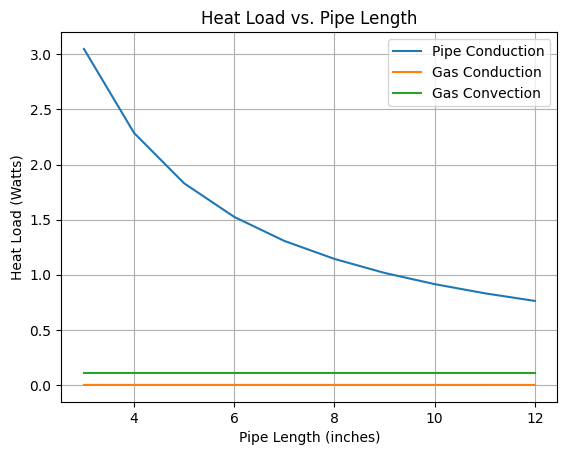

In [2]:
#same as right before (heat load based on pipe length) but different key
#do, pipe conduction, gas conduction, and gas convection
pipe_range = [3,12] #inches


pipe_thermal_conductivity = 16.2 #W/mK, for stainless steel
pipe_od = 0.375 *  (0.0254) #inches to meters         (od = 0.5 w/ i_radius = 0.075)
pipe_id = 0.05 * (0.0254) #inches to meters   (or od = 0.375 and i_radius = 0.05)
pipe_thickness = (pipe_od - pipe_id) / 2
pipe_cross_section = 3.14 * (pipe_od**2 - pipe_id**2) / 4
gas_thermal_conductivity = 0.0172 #hydrogen=0.1819, argon=0.0172
conv_heat_transfer_coeff = 100 #W/(m^2K), moderate to fast forced flow
valve_cross_section = 3.14 * (pipe_id**2)
purifier_temp = 503 #kelvin, ~230celsius
valve_temp = 298 #kelvin, ~room temp

def heatload_by_pipe(pipe_range):
    pipe_lengths = []
    pipe_heatloads = []
    for i in range(pipe_range[0], pipe_range[1]+1):
        pipe_length = i * 0.0254
        pipe_cond_heat_on_valve = (pipe_thermal_conductivity * pipe_cross_section * (purifier_temp-valve_temp)) / pipe_length
        pipe_lengths.append(i)
        pipe_heatloads.append(pipe_cond_heat_on_valve)
    return pipe_heatloads

def heatload_by_gas_cond(pipe_range):
    pipe_lengths = []
    gas_cond_heatloads = []
    for i in range(pipe_range[0], pipe_range[1]+1):
        pipe_length = i * 0.0254
        gas_cond_heat_on_valve = (gas_thermal_conductivity * valve_cross_section * (purifier_temp - valve_temp)) / pipe_length
        gas_cond_heatloads.append(gas_cond_heat_on_valve)
        pipe_lengths.append(i)
    return pipe_lengths, gas_cond_heatloads

def heatload_by_gas_conv(pipe_range):
    gas_conv_heatloads = []
    for i in range(pipe_range[0], pipe_range[1]+1):
        pipe_length = i * 0.0254
        conv_heat_on_valve = conv_heat_transfer_coeff * valve_cross_section * (purifier_temp - valve_temp)
        gas_conv_heatloads.append(conv_heat_on_valve)
    return gas_conv_heatloads

import matplotlib.pyplot as plt
def plot_heatloads(pipe_range):
    pipe_heats = heatload_by_pipe(pipe_range)
    pipe_lengths, gas_cond_heats = heatload_by_gas_cond(pipe_range)
    gas_conv_heats = heatload_by_gas_conv(pipe_range)
            
    plt.plot(pipe_lengths, pipe_heats, label='Pipe Conduction')
    plt.plot(pipe_lengths, gas_cond_heats, label='Gas Conduction')
    plt.plot(pipe_lengths, gas_conv_heats, label='Gas Convection')

    plt.xlabel("Pipe Length (inches)")
    plt.ylabel("Heat Load (Watts)")
    #plt.yscale('log')
    plt.title("Heat Load vs. Pipe Length")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_heatloads(pipe_range)

In [1]:
#how diff pipe sizes affect the conductive heatloads at a fixed length

pipe_od_range = [0.375,0.5]
pipe_id_range = [0.05,0.075]

pipe_thermal_conductivity = 16.2 #W/mK, for stainless steel
pipe_length_m = 6 * 0.0254 
purifier_temp = 503 #kelvin, ~230celsius
valve_temp = 298 #kelvin, ~room temp

import numpy as np
def heatload_vs_pipe_size(pipe_id_range):
    pipe_ids_in = np.arange(pipe_id_range[0], pipe_id_range[1] + 0.001, 0.005)
    pipe_ods_in = np.arange(pipe_od_range[0], pipe_od_range[1] + 0.001, 0.005)
    results = []

    for pipe_id_in in pipe_ids_in:
        for pipe_od_in in pipe_ods_in:
            if pipe_od_in <= pipe_id_in:
                continue 

                pipe_id_m = pipe_id_in * 0.0254
                pipe_od_m = pipe_od_in * 0.0254
                pipe_cross_section
                heat = (pipe_thermal_conductivity * pipe_cross_section * (purifier_temp - valve_temp)) / pipe_length_m

                pipe_heatloads.append(heat)

    return pipe_ids_in, pipe_heatloads

test = heatload_vs_pipe_size(pipe_id_range)
test


(array([0.05 , 0.055, 0.06 , 0.065, 0.07 ]), [])

In [3]:
#mass of molecular sieve needed for a given flow rate

flow_rate = 128 #L/hr based on 3/8" pipe w/ 0.5m/s
time_hours = 336
e_lifetime = 200e-6 #seconds

k_water = 1e11 #5.5e10 used for oxygen
molar_mass_H2O = 18 #g/mol
sieve_capacity_g_per_kg = 208 #g/kg ****IMPORTANT

total_volume = flow_rate * time_hours #liter

concentration_mol_per_L = 1 / (k_water * e_lifetime)
concentration_g_per_L = concentration_mol_per_L * molar_mass_H2O

total_water_g = concentration_g_per_L * total_volume
required_sieve_mass_kg = total_water_g / sieve_capacity_g_per_kg

required_sieve_mass_kg


0.00018609230769230767

In [1]:
import os
os.getcwd()

'/drive'

In [2]:
import os
os.listdir()

['LAr regen calculations.ipynb',
 'LAr-regen-calculations.git',
 'README.md',
 'data',
 'notebooks']